In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from os import chdir
from glob import glob
import pandas as pd
import glob
import os

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


In [16]:
df = pd.read_csv(r"C:\Users\antonebert\Desktop\WS2021 Programing\MADI\Activity Recognition from Single Chest-Mounted Accelerometer\9.csv")
df.columns=['Sequence','x','y','z','label']
df=df.drop(columns=['Sequence'])

df=df[df["label"] != 0] #data cleaning: Leaving out unlabeled data || (3719, 4)
print(df.shape)

df.head


(163739, 4)


<bound method NDFrame.head of            x     y     z  label
0       2249  2677  2046      1
1       2270  2568  2005      1
2       2222  2565  2003      1
3       2235  2571  2074      1
4       2205  2559  2075      1
...      ...   ...   ...    ...
166734  2071  2549  2053      7
166735  2072  2545  2059      7
166736  2069  2547  2064      7
166737  2069  2542  2062      7
166738  2069  2543  2063      7

[163739 rows x 4 columns]>

## Data are separated by participant
Each file contains the following information
sequential number, x acceleration, y acceleration, z acceleration, label
Labels are codified by numbers

1: Working at Computer

2: Standing Up, Walking and Going updown stairs

3: Standing

4: Walking

5: Going UpDown Stairs

6: Walking and Talking with Someone

7: Talking while Standing


#### Class Distribution 

<AxesSubplot:xlabel='label', ylabel='count'>

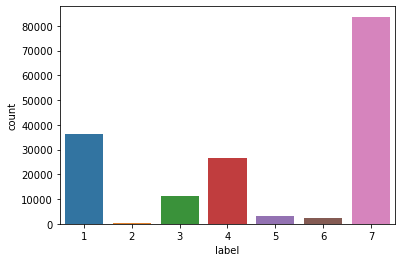

In [17]:
sns.countplot(x = 'label', data=df)

In [18]:
df.head(-5)

,x,y,z,label
0,2249,2677,2046,1
1,2270,2568,2005,1
2,2222,2565,2003,1
3,2235,2571,2074,1
4,2205,2559,2075,1
...,...,...,...,...
166729,2073,2542,2063,7
166730,2070,2540,2065,7
166731,2074,2547,2064,7
166732,2071,2548,2061,7


In [19]:
#Create input output data
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [20]:
# Split into train+val (80%) and test(20%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69) 

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [21]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [22]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=7)

In [24]:
print("=== Confusion Matrix ===")
confusion_matrix=confusion_matrix(y_test, rfc_predict)
confusion_matrix=(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis])
print(np.round(confusion_matrix,2))
print('\n')
print("=== Classification Report ===")
classification_report=classification_report(y_test, rfc_predict)
print(classification_report)
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

=== Confusion Matrix ===
[[0.95 0.   0.01 0.02 0.   0.   0.02]
 [0.82 0.12 0.   0.01 0.03 0.   0.02]
 [0.03 0.   0.27 0.34 0.03 0.   0.33]
 [0.03 0.   0.05 0.84 0.01 0.   0.08]
 [0.04 0.   0.16 0.33 0.08 0.   0.39]
 [0.01 0.   0.02 0.21 0.   0.03 0.73]
 [0.01 0.   0.02 0.03 0.01 0.   0.93]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.94      0.95      0.94     11820
           2       0.22      0.12      0.16       104
           3       0.44      0.27      0.33      3781
           4       0.72      0.84      0.77      8826
           5       0.19      0.08      0.11      1013
           6       0.14      0.03      0.05       854
           7       0.89      0.93      0.91     27636

    accuracy                           0.84     54034
   macro avg       0.50      0.46      0.47     54034
weighted avg       0.82      0.84      0.82     54034



=== All AUC Scores ===
[0.63363543 0.84631498 0.86892395 0.86546107 0.8497712

Data are separated by participant
Each file contains the following information sequential number, x acceleration, y acceleration, z acceleration, label Labels are codified by numbers

1: Working at Computer

2: Standing Up, Walking and Going updown stairs

3: Standing

4: Walking

5: Going UpDown Stairs

6: Walking and Talking with Someone

7: Talking while Standing

<AxesSubplot:>

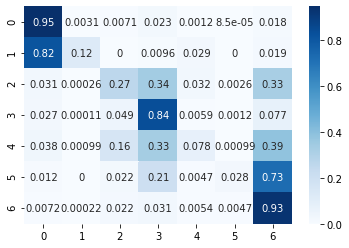